# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Mohammad 'Alwan Fauzi
- **Email:** mc006d5y1380@student.devacademy.id
- **ID Dicoding:** MC006D5Y1380

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan sepanjang tahun 2011 dan 2012?
- Bagaimana pengaruh kondisi cuaca (cuaca, suhu, kelembapan, dan kecepatan angin) terhadap jumlah penyewaan sepeda selama dua tahun (2011-2012)?

## Import Semua Packages/Library yang Digunakan

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Menampilkan dataframe

### Assessing Data

#### Menilai day_df

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Memuat informasi dataset

In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Menghitung jumlah missing value

In [11]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- mencari jumlah duplikasi

In [12]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- melakukan perintah describe untuk mencari informasi lebih lanjut

In [13]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

**Insight:**
- melihat variasi value

#### Menilai hour_df

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Memuat informasi dataset

In [15]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Menghitung jumlah missing value

In [16]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- mencari jumlah duplikasi

In [17]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- melakukan perintah describe untuk mencari informasi lebih lanjut

In [18]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

**Insight:**
- melihat variasi value

### Cleaning Data

In [19]:
#Tidak diperlukan proses cleaning data karena data telah bersih

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Pada Project ini dataset yang digunakan hanya dataset day.cvs

### Explore ...

C:\Users\Alwan Fauzi\AppData\Local\Temp\ipykernel_10556\2667757888.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday_type', y='cnt', data=day_df, palette=['blue', 'orange'])


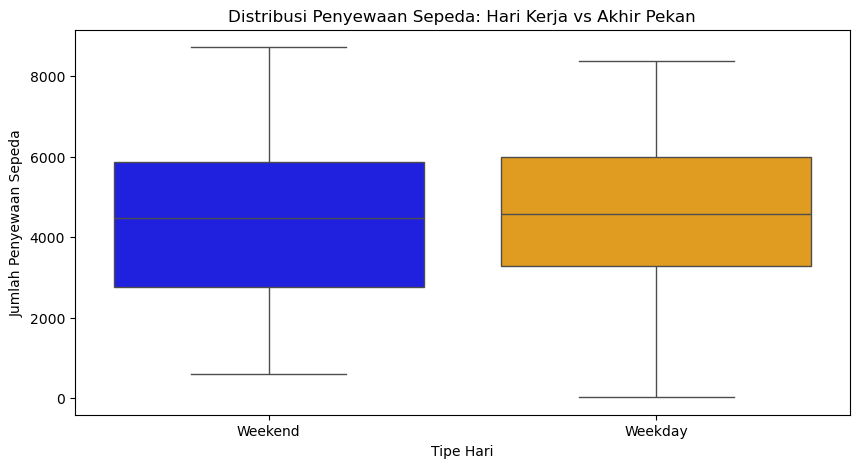

In [22]:
# Konversi kolom 'dteday' ke format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# 1. Analisis Pola Penggunaan Sepeda pada Hari Kerja vs Akhir Pekan

day_df['weekday_type'] = day_df['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

plt.figure(figsize=(10, 5))
sns.boxplot(x='weekday_type', y='cnt', data=day_df, palette=['blue', 'orange'])
plt.title('Distribusi Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- Median (garis dalam kotak) pada kedua kelompok cukup mirip, artinya jumlah penyewaan sepeda pada hari kerja dan akhir pekan tidak jauh berbeda secara umum.
- Distribusi lebih luas pada weekend dibandingkan weekday, yang berarti jumlah penyewaan sepeda di akhir pekan lebih bervariasi.
Whiskers lebih panjang pada weekend, menunjukkan ada hari-hari tertentu dengan penyewaan yang sangat tinggi dibandingkan hari kerja.

**Kesimpulan:**
- Hari kerja & akhir pekan memiliki pola yang mirip dalam hal jumlah penyewaan.
- Variasi lebih besar pada akhir pekan, mungkin karena ada hari-hari dengan lonjakan penyewaan tinggi.
- Tidak ada perbedaan drastis pada median, tetapi penyewaan di akhir pekan cenderung lebih tidak terprediksi dibandingkan hari kerja.

C:\Users\Alwan Fauzi\AppData\Local\Temp\ipykernel_10556\1511027916.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 1], x=day_df['weathersit'], y=day_df['cnt'], palette='coolwarm')


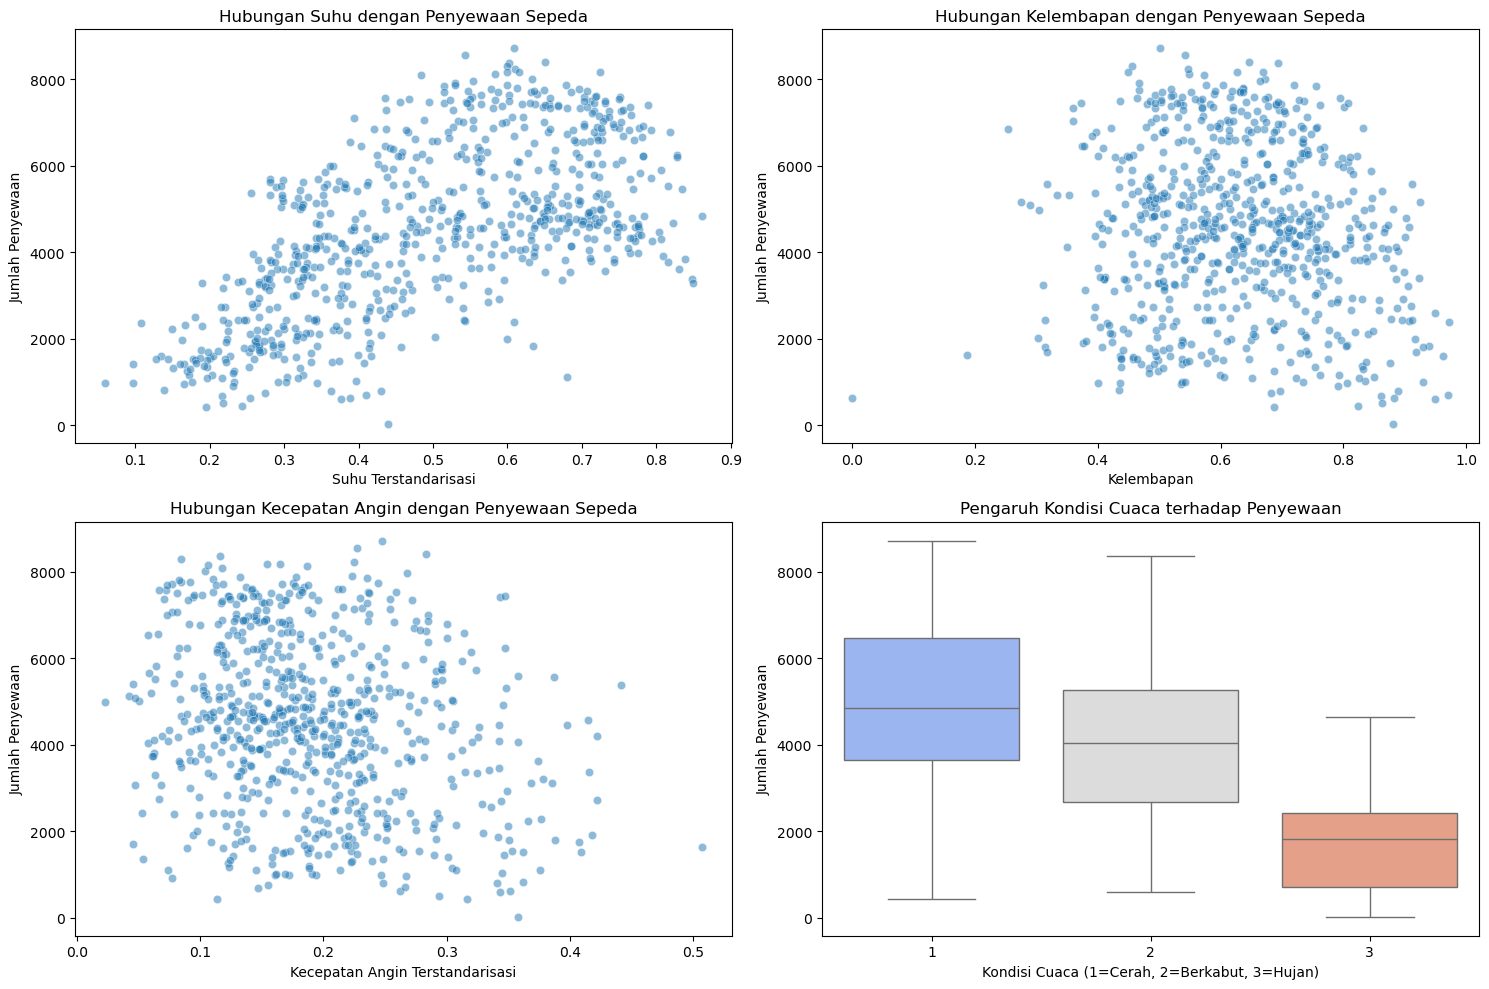

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(ax=axes[0, 0], x=day_df['temp'], y=day_df['cnt'], alpha=0.5)
axes[0, 0].set_title('Hubungan Suhu dengan Penyewaan Sepeda')
axes[0, 0].set_xlabel('Suhu Terstandarisasi')
axes[0, 0].set_ylabel('Jumlah Penyewaan')

sns.scatterplot(ax=axes[0, 1], x=day_df['hum'], y=day_df['cnt'], alpha=0.5)
axes[0, 1].set_title('Hubungan Kelembapan dengan Penyewaan Sepeda')
axes[0, 1].set_xlabel('Kelembapan')
axes[0, 1].set_ylabel('Jumlah Penyewaan')

sns.scatterplot(ax=axes[1, 0], x=day_df['windspeed'], y=day_df['cnt'], alpha=0.5)
axes[1, 0].set_title('Hubungan Kecepatan Angin dengan Penyewaan Sepeda')
axes[1, 0].set_xlabel('Kecepatan Angin Terstandarisasi')
axes[1, 0].set_ylabel('Jumlah Penyewaan')

sns.boxplot(ax=axes[1, 1], x=day_df['weathersit'], y=day_df['cnt'], palette='coolwarm')
axes[1, 1].set_title('Pengaruh Kondisi Cuaca terhadap Penyewaan')
axes[1, 1].set_xlabel('Kondisi Cuaca (1=Cerah, 2=Berkabut, 3=Hujan)')
axes[1, 1].set_ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

**Insight:**
1. Hubungan Suhu dengan Penyewaan Sepeda (Scatter Plot - Kiri Atas)
Terlihat tren positif antara suhu dengan jumlah penyewaan sepeda.
Semakin tinggi suhu terstandarisasi, semakin banyak penyewaan sepeda.
Namun, pada suhu yang sangat tinggi, jumlah penyewaan tampaknya sedikit menurun, yang mungkin menunjukkan bahwa suhu terlalu panas bisa mengurangi minat pengguna.
2. Hubungan Kelembapan dengan Penyewaan Sepeda (Scatter Plot - Kanan Atas)
Tidak ada pola yang jelas antara kelembapan dan jumlah penyewaan.
Penyewaan tersebar di seluruh rentang kelembapan, meskipun tampaknya lebih banyak penyewaan pada tingkat kelembapan sedang (~0.4 - 0.6).
Hal ini menunjukkan bahwa kelembapan mungkin bukan faktor utama dalam menentukan jumlah penyewaan sepeda.
3. Hubungan Kecepatan Angin dengan Penyewaan Sepeda (Scatter Plot - Kiri Bawah)
Tidak ada korelasi yang jelas antara kecepatan angin dan jumlah penyewaan.
Penyewaan tersebar secara acak, menunjukkan bahwa kecepatan angin tidak terlalu mempengaruhi keputusan penyewaan sepeda.
4. Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda (Boxplot - Kanan Bawah)
Kategori 1 (Cerah) memiliki jumlah penyewaan sepeda tertinggi secara rata-rata dan distribusi yang lebih lebar.
Kategori 2 (Berkabut) memiliki penyewaan lebih rendah dibandingkan kategori cerah tetapi masih cukup tinggi.
Kategori 3 (Hujan) memiliki jumlah penyewaan paling sedikit, dengan median yang jauh lebih rendah dibandingkan kategori lainnya.
Ini menunjukkan bahwa cuaca yang lebih buruk (hujan) secara signifikan mengurangi jumlah penyewaan sepeda.

**Kesimpulan:**
Suhu berpengaruh positif terhadap jumlah penyewaan sepeda, tetapi suhu yang terlalu tinggi bisa menurunkan penyewaan.
Kelembapan dan kecepatan angin tidak memiliki hubungan yang jelas dengan jumlah penyewaan.
Cuaca berpengaruh besar, dengan kondisi cerah meningkatkan penyewaan dan hujan menurunkannya secara signifikan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan sepanjang tahun 2011 dan 2012?

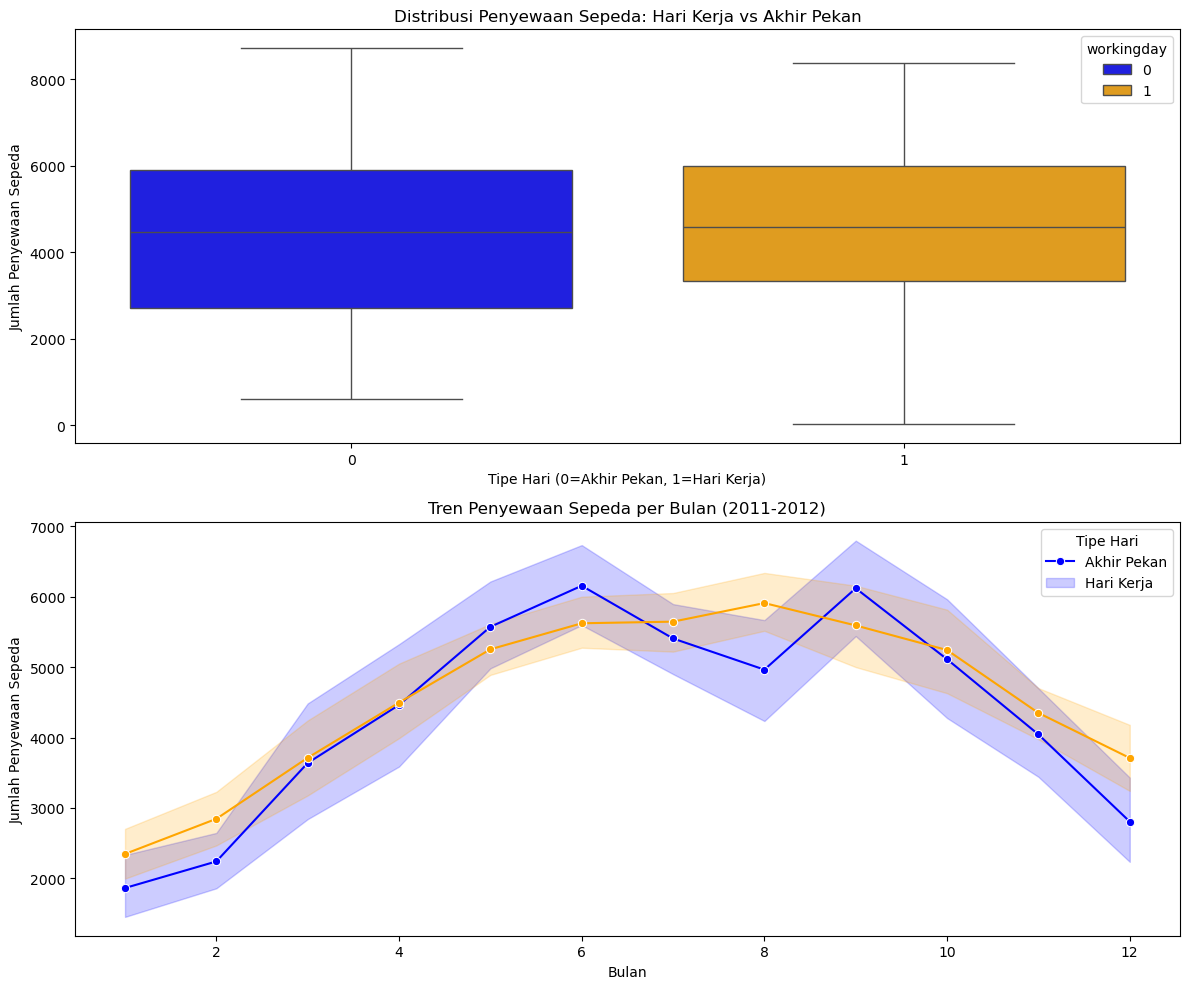

In [28]:
# Atur ukuran figure
plt.figure(figsize=(12, 10))

# Subplot 1: Distribusi Penyewaan Sepeda berdasarkan Tipe Hari
plt.subplot(2, 1, 1)
sns.boxplot(x=day_df['workingday'], y=day_df['cnt'], hue=day_df['workingday'], palette=['blue', 'orange'])
plt.xlabel('Tipe Hari (0=Akhir Pekan, 1=Hari Kerja)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Distribusi Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')

# Subplot 2: Tren Penyewaan Sepeda per Bulan (Hari Kerja vs Akhir Pekan)
plt.subplot(2, 1, 2)
sns.lineplot(x=day_df['mnth'], y=day_df['cnt'], hue=day_df['workingday'], marker='o', palette=['blue', 'orange'])
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Tren Penyewaan Sepeda per Bulan (2011-2012)')
plt.legend(title='Tipe Hari', labels=['Akhir Pekan', 'Hari Kerja'])

plt.tight_layout()
plt.show()

**Insight:**
Plot ini menunjukkan perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan menggunakan boxplot, serta tren penggunaan sepeda setiap bulan.

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca (cuaca, suhu, kelembapan, dan kecepatan angin) terhadap jumlah penyewaan sepeda selama dua tahun (2011-2012)?

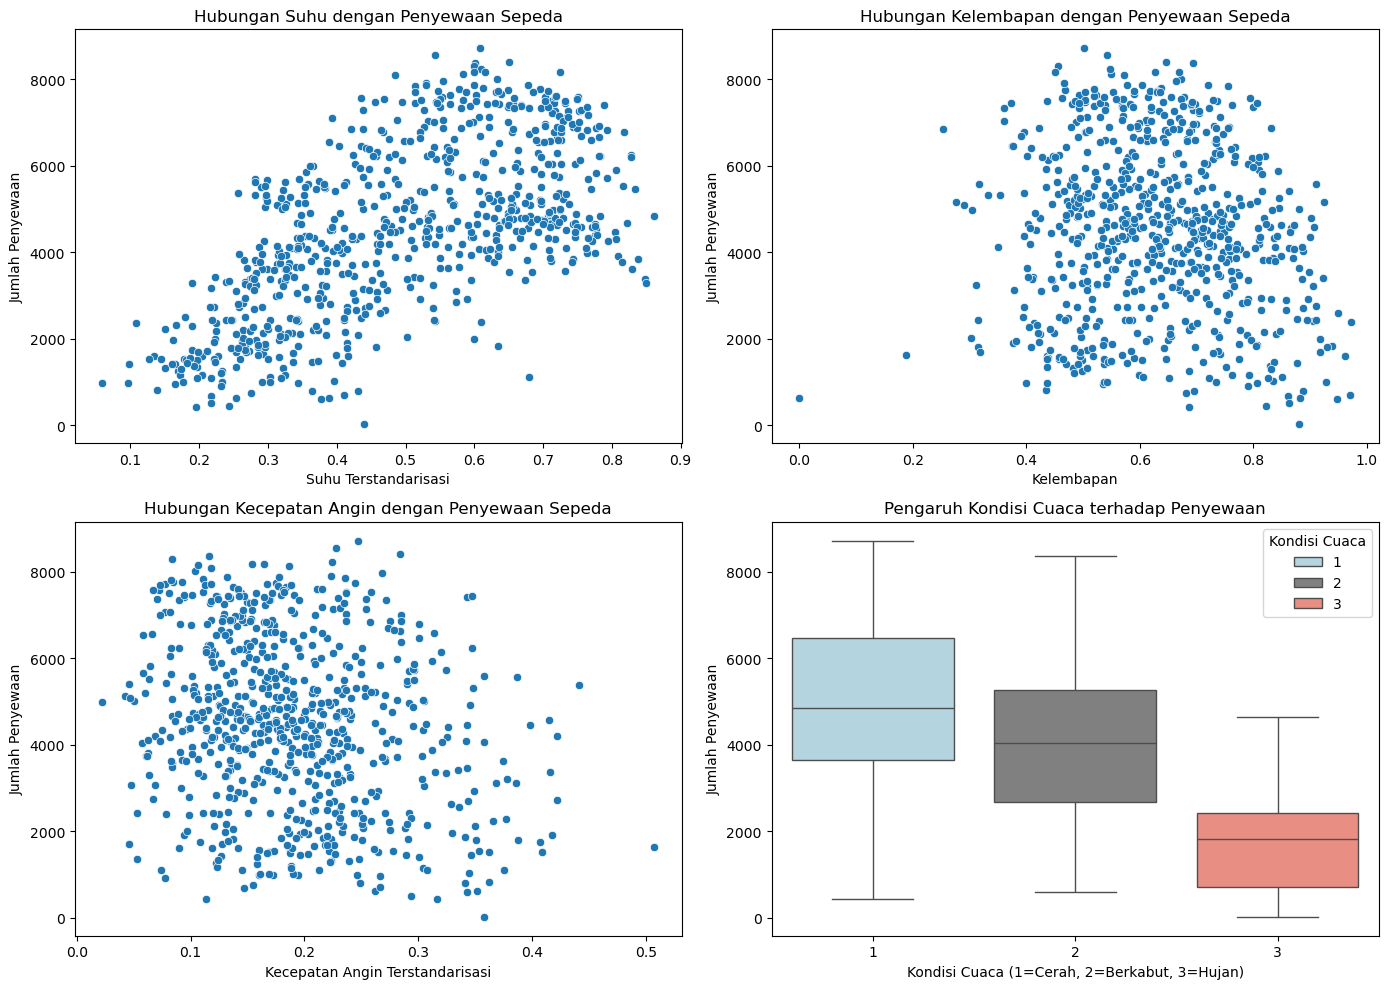

In [32]:
# Visualisasi pengaruh cuaca terhadap jumlah penyewaan sepeda

# Atur ukuran figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot: Hubungan Suhu dengan Penyewaan Sepeda
sns.scatterplot(ax=axes[0, 0], x=day_df['temp'], y=day_df['cnt'])
axes[0, 0].set_title('Hubungan Suhu dengan Penyewaan Sepeda')
axes[0, 0].set_xlabel('Suhu Terstandarisasi')
axes[0, 0].set_ylabel('Jumlah Penyewaan')

# Scatter plot: Hubungan Kelembapan dengan Penyewaan Sepeda
sns.scatterplot(ax=axes[0, 1], x=day_df['hum'], y=day_df['cnt'])
axes[0, 1].set_title('Hubungan Kelembapan dengan Penyewaan Sepeda')
axes[0, 1].set_xlabel('Kelembapan')
axes[0, 1].set_ylabel('Jumlah Penyewaan')

# Scatter plot: Hubungan Kecepatan Angin dengan Penyewaan Sepeda
sns.scatterplot(ax=axes[1, 0], x=day_df['windspeed'], y=day_df['cnt'])
axes[1, 0].set_title('Hubungan Kecepatan Angin dengan Penyewaan Sepeda')
axes[1, 0].set_xlabel('Kecepatan Angin Terstandarisasi')
axes[1, 0].set_ylabel('Jumlah Penyewaan')

# Boxplot: Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda
sns.boxplot(ax=axes[1, 1], x=day_df['weathersit'], y=day_df['cnt'], hue=day_df['weathersit'], 
            palette=['lightblue', 'gray', 'salmon'])
axes[1, 1].set_title('Pengaruh Kondisi Cuaca terhadap Penyewaan')
axes[1, 1].set_xlabel('Kondisi Cuaca (1=Cerah, 2=Berkabut, 3=Hujan)')
axes[1, 1].set_ylabel('Jumlah Penyewaan')
axes[1, 1].legend(title='Kondisi Cuaca')

plt.tight_layout()
plt.show()

**Insight:**
- Scatter plot antara suhu dan jumlah penyewaan sepeda (menunjukkan tren positif).
- Scatter plot antara kelembapan dan penyewaan sepeda (tidak ada tren jelas).
- Scatter plot antara kecepatan angin dan penyewaan sepeda (tidak ada tren jelas).
- Boxplot menunjukkan pengaruh kondisi cuaca terhadap penyewaan sepeda, di mana hujan menyebabkan penurunan signifikan.

## Conclusion Pertanyaan 1

1. Distribusi Penyewaan Sepeda: Hari Kerja vs Akhir Pekan (Boxplot)
- Jumlah penyewaan sepeda baik pada hari kerja (workingday=1) maupun akhir pekan (workingday=0) memiliki distribusi yang cukup mirip.
- Penyewaan sepeda cenderung lebih bervariasi pada hari kerja dibandingkan akhir pekan, dengan beberapa outlier yang menunjukkan penyewaan sangat tinggi.
- Median jumlah penyewaan pada hari kerja sedikit lebih tinggi dibandingkan akhir pekan, yang menunjukkan bahwa sepeda lebih banyak digunakan pada hari kerja.
2. Tren Penyewaan Sepeda per Bulan (Line Plot)
- Tren penyewaan sepeda meningkat dari awal tahun dan mencapai puncaknya di pertengahan tahun (Mei - Agustus), lalu menurun di akhir tahun.
Baik pada hari kerja maupun akhir pekan, pola tren penyewaan hampir sama, tetapi jumlah penyewaan di hari kerja umumnya lebih tinggi dibandingkan akhir pekan.
- Fluktuasi penggunaan lebih terlihat pada akhir pekan (ditunjukkan oleh rentang area bayangan yang lebih luas).
- Penurunan drastis di bulan Desember kemungkinan besar dipengaruhi oleh faktor cuaca (musim dingin).

**Kesimpulan Umum**
- Jumlah penyewaan sepeda lebih tinggi di hari kerja dibandingkan akhir pekan, menunjukkan bahwa sepeda digunakan sebagai sarana transportasi utama untuk bekerja atau sekolah.
- Tren penyewaan dipengaruhi oleh musim, dengan peningkatan penggunaan selama musim panas dan penurunan selama musim dingin.
- Fluktuasi lebih besar terjadi pada akhir pekan, yang bisa jadi karena faktor aktivitas rekreasi yang lebih fleksibel dibandingkan rutinitas di hari kerja.

## Conclusion Pertanyaan 2

1. Hubungan Suhu dengan Penyewaan Sepeda (Scatter Plot - Kiri Atas)
Terdapat hubungan positif antara suhu dan jumlah penyewaan sepeda.
Semakin tinggi suhu (hingga sekitar 0.7-0.8 dalam skala terstandarisasi), semakin banyak sepeda yang disewa.
Setelah titik tertentu (>0.8), jumlah penyewaan mulai menurun, yang mungkin disebabkan oleh suhu yang terlalu panas dan menjadi tidak nyaman untuk bersepeda.
2. Hubungan Kelembapan dengan Penyewaan Sepeda (Scatter Plot - Kanan Atas)
Tidak ada pola hubungan yang jelas antara kelembapan dan penyewaan sepeda.
Namun, penyewaan cenderung lebih rendah pada kelembapan tinggi (di atas 0.8), yang mungkin disebabkan oleh kondisi yang kurang nyaman untuk bersepeda.
3. Hubungan Kecepatan Angin dengan Penyewaan Sepeda (Scatter Plot - Kiri Bawah)
Tidak ada hubungan yang jelas antara kecepatan angin dan jumlah penyewaan sepeda.
Titik-titik penyebaran cukup acak, menandakan bahwa kecepatan angin mungkin bukan faktor utama yang mempengaruhi keputusan untuk menyewa sepeda.
4. Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda (Boxplot - Kanan Bawah)
Kondisi cuaca sangat mempengaruhi jumlah penyewaan sepeda.
Cuaca cerah (1) memiliki jumlah penyewaan tertinggi, dengan distribusi yang lebih luas dan median yang lebih tinggi dibandingkan kondisi cuaca lainnya.
Cuaca berkabut (2) memiliki penyewaan yang lebih rendah dibandingkan cuaca cerah, tetapi masih lebih baik dibandingkan kondisi hujan.
Cuaca hujan (3) menyebabkan penurunan drastis dalam jumlah penyewaan sepeda, yang wajar karena bersepeda dalam kondisi hujan kurang nyaman dan berisiko.

**Kesimpulan Umum**
- Suhu adalah faktor yang berpengaruh signifikan terhadap penyewaan sepeda, dengan peningkatan jumlah penyewaan hingga suhu tertentu, lalu menurun jika terlalu panas.
- Kelembapan dan kecepatan angin tidak memiliki hubungan yang jelas, tetapi penyewaan cenderung lebih sedikit pada kelembapan tinggi.
- Kondisi cuaca adalah faktor utama yang mempengaruhi penyewaan sepeda, dengan penyewaan tertinggi saat cuaca cerah dan menurun drastis saat hujan.